# Decision Tree Classifier 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import shap

import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('opencnil-violationsdcpnotifiees-20241231.csv', sep = ';')
data.head()

,Date de réception de la notification,Secteur d'activité de l'organisme concerné,Natures de la violation,Nombre de personnes impactées,Typologies des données impactées,Données sensibles,Origines de l'incident,Causes de l'incident,Information des personnes
0,2024-12,"Activités spécialisées, scientifiques et techn...",Perte de la confidentialité,Entre 301 et 5000 personnes,"Etat civil (ex : nom, sexe, date de naissance,...",NaN,"Piratage, logiciel malveillant (par exemple ra...",Acte externe malveillant,"Oui, les personnes ont été informées"
1,2024-12,Administration publique,Perte de la confidentialité,Entre 6 et 50 personnes,NaN,Oui,"Equipement perdu ou volé,Papier perdu, volé ou...",Acte externe malveillant,Non déterminé pour le moment
2,2024-12,Information et communication,Perte de la disponibilité,Entre 51 et 300 personnes,"Etat civil (ex : nom, sexe, date de naissance,...",NaN,"Piratage, logiciel malveillant (par exemple ra...",Acte externe malveillant,"Non, mais elles le seront"
3,2024-12,Autres activités de services,Perte de la confidentialité,Entre 51 et 300 personnes,Coordonnées (ex : adresse postale ou électroni...,NaN,Données personnelles envoyées à un mauvais des...,Acte interne accidentel,"Non, mais elles le seront"
4,2024-12,"Activités spécialisées, scientifiques et techn...","Perte de la confidentialité,Perte de l'intégri...",Entre 6 et 50 personnes,Coordonnées (ex : adresse postale ou électroni...,NaN,"Piratage, logiciel malveillant (par exemple ra...",Acte externe malveillant,"Oui, les personnes ont été informées"


## Data analysis

- `Date de réception de la notification` \- Ordinal 
- `Secteur d'activité de l'organisme concerné` \- Nominal
- `Natures de la violation` \- Nominal 
- `Nombre de personnes impactées` \- Ordinal
- `Typologies des données impactées` \- Nominal
- `Données sensibles` \- Nominal value to predict
- `Origines de l'incident` \- Nominal 
- `Causes de l'incident` \- Nominal
- `Information des personnes` \- Nominal

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Date de réception de la notification        25697 non-null  object
 1   Secteur d'activité de l'organisme concerné  25697 non-null  object
 2   Natures de la violation                     25697 non-null  object
 3   Nombre de personnes impactées               25697 non-null  object
 4   Typologies des données impactées            25545 non-null  object
 5   Données sensibles                           4913 non-null   object
 6   Origines de l'incident                      25697 non-null  object
 7   Causes de l'incident                        25697 non-null  object
 8   Information des personnes                   25697 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB


In [30]:
# Checking for missing values
data.isnull().sum()

Date de réception de la notification              0
Secteur d'activité de l'organisme concerné        0
Natures de la violation                           0
Nombre de personnes impactées                     0
Typologies des données impactées                152
Données sensibles                             20784
Origines de l'incident                            0
Causes de l'incident                              0
Information des personnes                         0
dtype: int64

In [31]:
# get unique values in each column
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].unique())
    print("\n")

Date de réception de la notification : 80 unique values
['2024-12' '2024-11' '2024-10' '2024-09' '2024-08' '2024-07' '2024-06'
 '2024-05' '2024-04' '2024-03' '2024-02' '2024-01' '2023-12' '2023-11'
 '2023-10' '2023-09' '2023-08' '2023-07' '2023-06' '2023-05' '2023-04'
 '2023-03' '2023-02' '2023-01' '2022-12' '2022-11' '2022-10' '2022-09'
 '2022-08' '2022-07' '2022-06' '2022-05' '2022-04' '2022-03' '2022-02'
 '2022-01' '2021-12' '2021-11' '2021-10' '2021-09' '2021-08' '2021-07'
 '2021-06' '2021-05' '2021-04' '2021-03' '2021-02' '2021-01' '2020-12'
 '2020-11' '2020-10' '2020-09' '2020-08' '2020-07' '2020-06' '2020-05'
 '2020-04' '2020-03' '2020-02' '2020-01' '2019-12' '2019-11' '2019-10'
 '2019-09' '2019-08' '2019-07' '2019-06' '2019-05' '2019-04' '2019-03'
 '2019-02' '2019-01' '2018-12' '2018-11' '2018-10' '2018-09' '2018-08'
 '2018-07' '2018-06' '2018-05']


Secteur d'activité de l'organisme concerné: 22 unique values
['Activités spécialisées, scientifiques et techniques'
 'Administrat

In [32]:
# get unique value counts in each column
for col in data.columns:
    print(f"{col}:")
    print(data[col].value_counts())
    print("\n")

Date de réception de la notification :
Date de réception de la notification 
2022-02    1147
2021-05     858
2024-02     825
2021-07     788
2021-12     687
           ... 
2019-08     129
2018-12     128
2018-08     127
2018-09     103
2018-05      17
Name: count, Length: 80, dtype: int64


Secteur d'activité de l'organisme concerné:
Secteur d'activité de l'organisme concerné
Administration publique                                                                                                                                4564
Activités spécialisées, scientifiques et techniques                                                                                                    3412
Activités financières et d''assurance                                                                                                                  3085
Santé humaine et action sociale                                                                                                                        2

In [33]:
# get number of unique values per column
data.nunique()

Date de réception de la notification           80
Secteur d'activité de l'organisme concerné     22
Natures de la violation                         7
Nombre de personnes impactées                   5
Typologies des données impactées              381
Données sensibles                               1
Origines de l'incident                        126
Causes de l'incident                           39
Information des personnes                       4
dtype: int64

In [34]:
# get counts of multi-label Natures de la violation:
nature_counts = data['Natures de la violation'].value_counts()
print(nature_counts)

# Split the multi-label column into separate binary columns
nature_dummies = data['Natures de la violation'].str.get_dummies(sep=',')
nature_dummies.head()
# shows counts of each nature
nature_dummies.sum().sort_values(ascending=False).to_string().split('\n')

Natures de la violation
Perte de la confidentialité                                                   17594
Perte de la confidentialité,Perte de la disponibilité                          2296
Perte de la disponibilité                                                      2060
Perte de la confidentialité,Perte de l'intégrité,Perte de la disponibilité     1695
Perte de la confidentialité,Perte de l'intégrité                               1131
Perte de l'intégrité,Perte de la disponibilité                                  578
Perte de l'intégrité                                                            343
Name: count, dtype: int64


['Perte de la confidentialité    22716',
 'Perte de la disponibilité       6629',
 "Perte de l'intégrité            3747"]

## Decision on the question

Question

> Given an incident's cause and origin can we predict the type of violation?

Will train 3 binary classification models:

- **Model 1**: Predicts "Does this incident involve confidentiality loss?" (22,716 yes vs ~2,900 no)
- **Model 2**: Predicts "Does this incident involve availability loss?" (6,629 yes vs ~19,000 no)
- **Model 3**: Predicts "Does this incident involve integrity loss?" (3,747 yes vs ~21,900 no)



### Preprocessing features (feature engineering...?)

**Input complexity**: 126 for Origins and 39 for causes - both are multi-label data.

Origins is possibly unmanageable and Cause appears manageable (assuming preprocessing doesn't explode this number)

**Output complexity**: 3 binary classification models rather than 7 ((2^3)-1) classification labels on one model

**Data pattern**: Clear categorial problem


In [35]:
# Split the multi-label column into separate binary columns
cause_dummies = data["Origines de l\'incident"].str.get_dummies(sep=',')
cause_dummies.head()
# shows counts of each nature
cause_dummies.sum().sort_values(ascending=False).to_string().split('\n')

[' logiciel malveillant (par exemple rançongiciel) et/ou hameçonnage                                  13500',
 'Piratage                                                                                            13500',
 'Autre                                                                                                5070',
 'Données personnelles envoyées à un mauvais destinataire                                              2950',
 "Publication non volontaire d'informations                                                            2217",
 'Equipement perdu ou volé                                                                             1996',
 'Données de la mauvaise personne affichées sur le portail du client                                    731',
 'Papier perdu                                                                                          687',
 ' volé ou laissé accessible dans un endroit non sécurisé                                               687',
 'Informat

In [36]:
# Split the multi-label column into separate binary columns
cause_dummies = data["Causes de l\'incident"].str.get_dummies(sep=',')
cause_dummies.head()
# shows counts of each nature
cause_dummies.sum().sort_values(ascending=False).to_string().split('\n')

['Acte externe malveillant    15148',
 'Acte interne accidentel      5244',
 'Inconnu                      2196',
 'Autre                        1767',
 'Acte externe accidentel      1402',
 'Acte interne malveillant     1220']

### Update to preprocessing 

The features are a lot more tractable with 13 Origins and 6 causes


In [37]:
# For causes - create 6 binary features
data['cause_external_malicious'] = data['Causes de l\'incident'].str.contains('Acte externe malveillant', na=False)
data['cause_internal_accidental'] = data['Causes de l\'incident'].str.contains('Acte interne accidentel', na=False)
data['cause_external_accidental'] = data['Causes de l\'incident'].str.contains('Acte externe accidentel', na=False)
data['cause_internal_malicious'] = data['Causes de l\'incident'].str.contains('Acte interne malveillant', na=False)
data['cause_unknown'] = data['Causes de l\'incident'].str.contains('Inconnu', na=False)
data['cause_other'] = data['Causes de l\'incident'].str.contains('Autre', na=False)

# Check the feature extraction worked
cause_features = [col for col in data.columns if col.startswith('cause_')]
# print cause features created in table format
cause_feature_counts = {feature: data[feature].sum() for feature in cause_features}
cause_feature_df = pd.DataFrame(list(cause_feature_counts.items()), columns=['Cause Feature', 'Count'])
cause_feature_df                                               


,Cause Feature,Count
0,cause_external_malicious,15148
1,cause_internal_accidental,5244
2,cause_external_accidental,1402
3,cause_internal_malicious,1220
4,cause_unknown,2196
5,cause_other,1767


In [38]:


# For origins - create binary features for the main categories
data['origin_malware_phishing'] = data['Origines de l\'incident'].str.contains('logiciel malveillant.*hameçonnage|Piratage', na=False)
data['origin_misdirected_data'] = data['Origines de l\'incident'].str.contains('Données personnelles envoyées à un mauvais destinataire', na=False)
data['origin_involuntary_publication'] = data['Origines de l\'incident'].str.contains('Publication non volontaire d\'informations', na=False)
data['origin_lost_stolen_equipment'] = data['Origines de l\'incident'].str.contains('Equipement perdu ou volé', na=False)
data['origin_lost_paper'] = data['Origines de l\'incident'].str.contains('Papier perdu.*accessible.*non sécurisé', na=False)
data['origin_verbal_disclosure'] = data['Origines de l\'incident'].str.contains('Informations personnelles divulguées.*verbale', na=False)
data['origin_lost_mail'] = data['Origines de l\'incident'].str.contains('Courrier perdu.*retourné', na=False)
data['origin_improper_disposal'] = data['Origines de l\'incident'].str.contains('Mise au rebut.*sans.*sécurisé|sans destruction physique', na=False)
data['origin_wrong_person_portal'] = data['Origines de l\'incident'].str.contains('mauvaise personne.*portail', na=False)
data['origin_other'] = data['Origines de l\'incident'].str.contains('Autre', na=False)

# Check the feature extraction worked
origin_features = [col for col in data.columns if col.startswith('origin_')]

# print origin features created in table format
origin_feature_counts = {feature: data[feature].sum() for feature in origin_features}
origin_feature_df = pd.DataFrame(list(origin_feature_counts.items()), columns=['Origin Feature', 'Count'])
origin_feature_df

,Origin Feature,Count
0,origin_malware_phishing,13500
1,origin_misdirected_data,2950
2,origin_involuntary_publication,2217
3,origin_lost_stolen_equipment,1996
4,origin_lost_paper,687
5,origin_verbal_disclosure,224
6,origin_lost_mail,174
7,origin_improper_disposal,89
8,origin_wrong_person_portal,731
9,origin_other,5070


In [39]:
# Create the target variables
# Perte de la confidentialité,Perte de l'intégrité,Perte de la disponibilité"
data['Disponibilité'] = data['Natures de la violation'].str.contains('disponibilité|Disponibilité', na=False, case=False)
data['Intégrité'] = data['Natures de la violation'].str.contains('intégrité|Intégrité', na=False, case=False)
data['Confidentialité'] = data['Natures de la violation'].str.contains('confidentialité|Confidentialité', na=False, case=False)

print("\nAll targets:")
print(f"Availability: {data['Disponibilité'].sum()}")
print(f"Integrity: {data['Intégrité'].sum()}")  
print(f"Confidentiality: {data['Confidentialité'].sum()}")


All targets:
Availability: 6629
Integrity: 3747
Confidentiality: 22716


In [40]:
# Create the datasets
X = data[origin_features + cause_features]
y_availability = data['Disponibilité']
y_integrity = data['Intégrité']
y_confidentiality = data['Confidentialité']


### Data categories

The columns have been transformed.

**Original columns:**
- `Date de réception de la notification`        - Remove
- `Secteur d'activité de l'organisme concerné`  - Nominal
- `Nombre de personnes impactées`               - Ordinal
- `Typologies des données impactées`            - Nominal
- `Données sensibles`                           - Remove
- `Information des personnes`                   - Nominal

**New cause features:**
- `cause_external_malicious`                    - Binary
- `cause_internal_accidental`                   - Binary 
- `cause_external_accidental`                   - Binary
- `cause_internal_malicious`                    - Binary
- `cause_unknown`                               - Binary
- `cause_other`                                 - Binary

**New origin features:**
- `origin_malware_phishing`                     - Binary
- `origin_misdirected_data`                     - Binary
- `origin_involuntary_publication`              - Binary 
- `origin_lost_stolen_equipment`                - Binary
- `origin_wrong_person_portal`                  - Binary
- `origin_lost_paper`                           - Binary
- `origin_verbal_disclosure`                    - Binary
- `origin_lost_mail`                            - Binary
- `origin_improper_disposal`                    - Binary
- `origin_other`                                - Binary



In [41]:
# encode the categorical features
print(data['origin_malware_phishing'].dtype)
print(data['origin_malware_phishing'].value_counts())

bool
origin_malware_phishing
True     13500
False    12197
Name: count, dtype: int64


In [42]:
nominal_variable = [
    'Secteur d\'activité de l\'organisme concerné', 
    'Typologies des données impactées', 
    'Information des personnes'
    ]

ordinal_variable = ['Nombre de personnes impactées']

numeric_variable = [
    'cause_external_malicious', 'cause_internal_accidental', 
    'cause_external_accidental', 'cause_internal_malicious', 
    'cause_unknown', 'cause_other',
    'origin_malware_phishing', 'origin_misdirected_data',
    'origin_involuntary_publication', 'origin_lost_stolen_equipment',
    'origin_wrong_person_portal', 'origin_lost_paper', 
    'origin_verbal_disclosure', 'origin_lost_mail', 
    'origin_improper_disposal', 'origin_other'
    ]

ordinal_encoder = OrdinalEncoder()
label_encoder = OneHotEncoder(handle_unknown = 'ignore')

preprocessor = ColumnTransformer([
    ('ordinal', ordinal_encoder, ordinal_variable),
    ('nominal', label_encoder, nominal_variable),
    ('numeric', 'passthrough', numeric_variable)
])

## Modelling

How is the data balanced? 

- **Availability**: 6,629 yes vs ~19,000 no (roughly 1:3 ratio - most balanced)
- **Integrity**: 3,747 yes vs ~21,900 no (roughly 1:6 ratio)
- **Confidentiality**: 22,716 yes vs ~2,900 no (roughly 8:1 ratio - most imbalanced)


In [43]:

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define your feature matrix and target
# Exclude your target variables from features
feature_columns = nominal_variable + ordinal_variable + numeric_variable
X = data[feature_columns]
y = data['Disponibilité']  # Start with availability 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Train Accuracy: 0.945
Test Accuracy: 0.785

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.88      0.86      3814
        True       0.60      0.51      0.55      1326

    accuracy                           0.79      5140
   macro avg       0.72      0.70      0.70      5140
weighted avg       0.78      0.79      0.78      5140


Confusion Matrix:
[[3360  454]
 [ 650  676]]


In [45]:
# get feature names directly from fitted preprocessor
all_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

Top 15 most important features:
                                               feature  importance
0               ordinal__Nombre de personnes impactées    0.105282
392                   numeric__origin_malware_phishing    0.079220
382  nominal__Information des personnes_Non détermi...    0.051358
21   nominal__Secteur d'activité de l'organisme con...    0.023940
387                 numeric__cause_internal_accidental    0.023072
401                              numeric__origin_other    0.021924
385  nominal__Information des personnes_Oui, les pe...    0.021919
6    nominal__Secteur d'activité de l'organisme con...    0.021787
7    nominal__Secteur d'activité de l'organisme con...    0.019639
390                             numeric__cause_unknown    0.019607
384  nominal__Information des personnes_Non, mais e...    0.018906
107  nominal__Typologies des données impactées_Etat...    0.018035
386                  numeric__cause_external_malicious    0.017355
350  nominal__Typologies des d

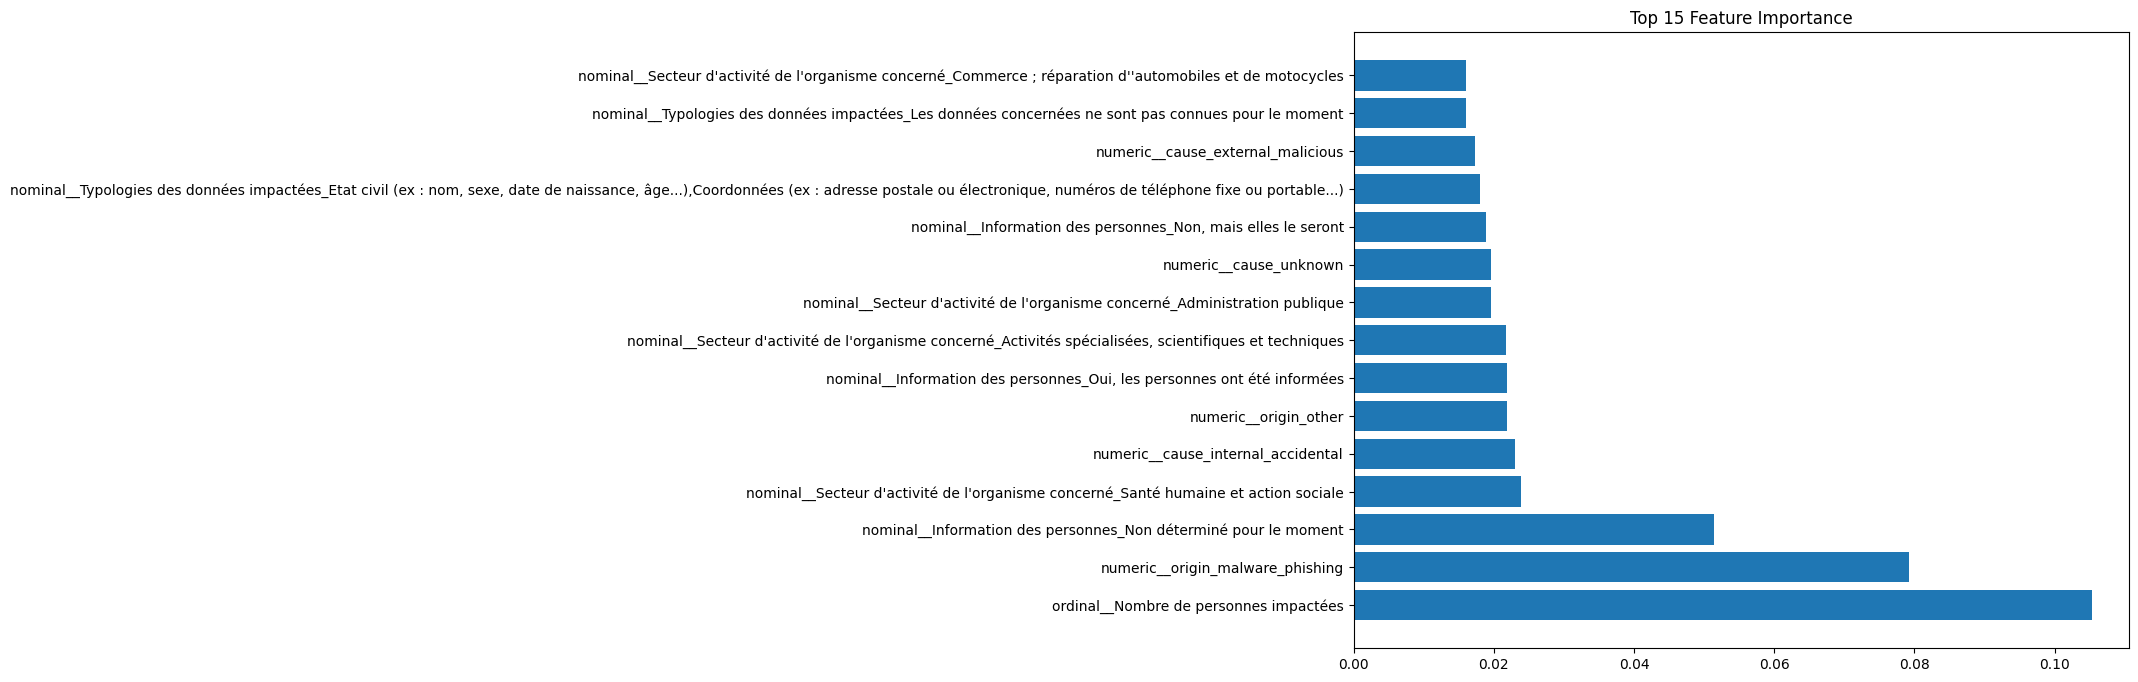

In [46]:
# Get feature importance from your full model
feature_importance = pipeline.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Top 15 most important features:")
print(importance_df.head(15))

# Plot top features
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.barh(importance_df.head(15)['feature'], importance_df.head(15)['importance'])
plt.title('Top 15 Feature Importance')
plt.show()

In [47]:
# Debug the preprocessing step by step
print("Original data types:")
print(X[nominal_variable].dtypes)

# Check for non-string values in nominal columns
for col in nominal_variable:
    print(f"\n{col} unique values count: {X[col].nunique()}")
    print(f"Sample values: {X[col].unique()[:5]}")
    
# Try fitting just the preprocessor
try:
    X_processed = preprocessor.fit_transform(X)
    print(f"Preprocessing successful. Shape: {X_processed.shape}")
    print(f"Data type after preprocessing: {type(X_processed)}")
    
    # Check if it's sparse matrix
    if hasattr(X_processed, 'toarray'):
        print("Converting sparse matrix to dense...")
        X_processed = X_processed.toarray()
        
    print(f"Sample of processed data:\n{X_processed[:2, :5]}")
    
except Exception as e:
    print(f"Preprocessing failed: {e}")

Original data types:
Secteur d'activité de l'organisme concerné    object
Typologies des données impactées              object
Information des personnes                     object
dtype: object

Secteur d'activité de l'organisme concerné unique values count: 22
Sample values: ['Activités spécialisées, scientifiques et techniques'
 'Administration publique' 'Information et communication'
 'Autres activités de services' 'Industrie manufacturière']

Typologies des données impactées unique values count: 381
Sample values: ['Etat civil (ex : nom, sexe, date de naissance, âge...),Coordonnées (ex : adresse postale ou électronique, numéros de téléphone fixe ou portable...)'
 nan
 'Coordonnées (ex : adresse postale ou électronique, numéros de téléphone fixe ou portable...)'
 'Coordonnées (ex : adresse postale ou électronique, numéros de téléphone fixe ou portable...),Données relatives à des informations financières (ex : revenus, numéro de carte de crédit, coordonnées bancaires), économiques,Do

X_train_processed shape: (20557, 425)
Number of feature names: 425


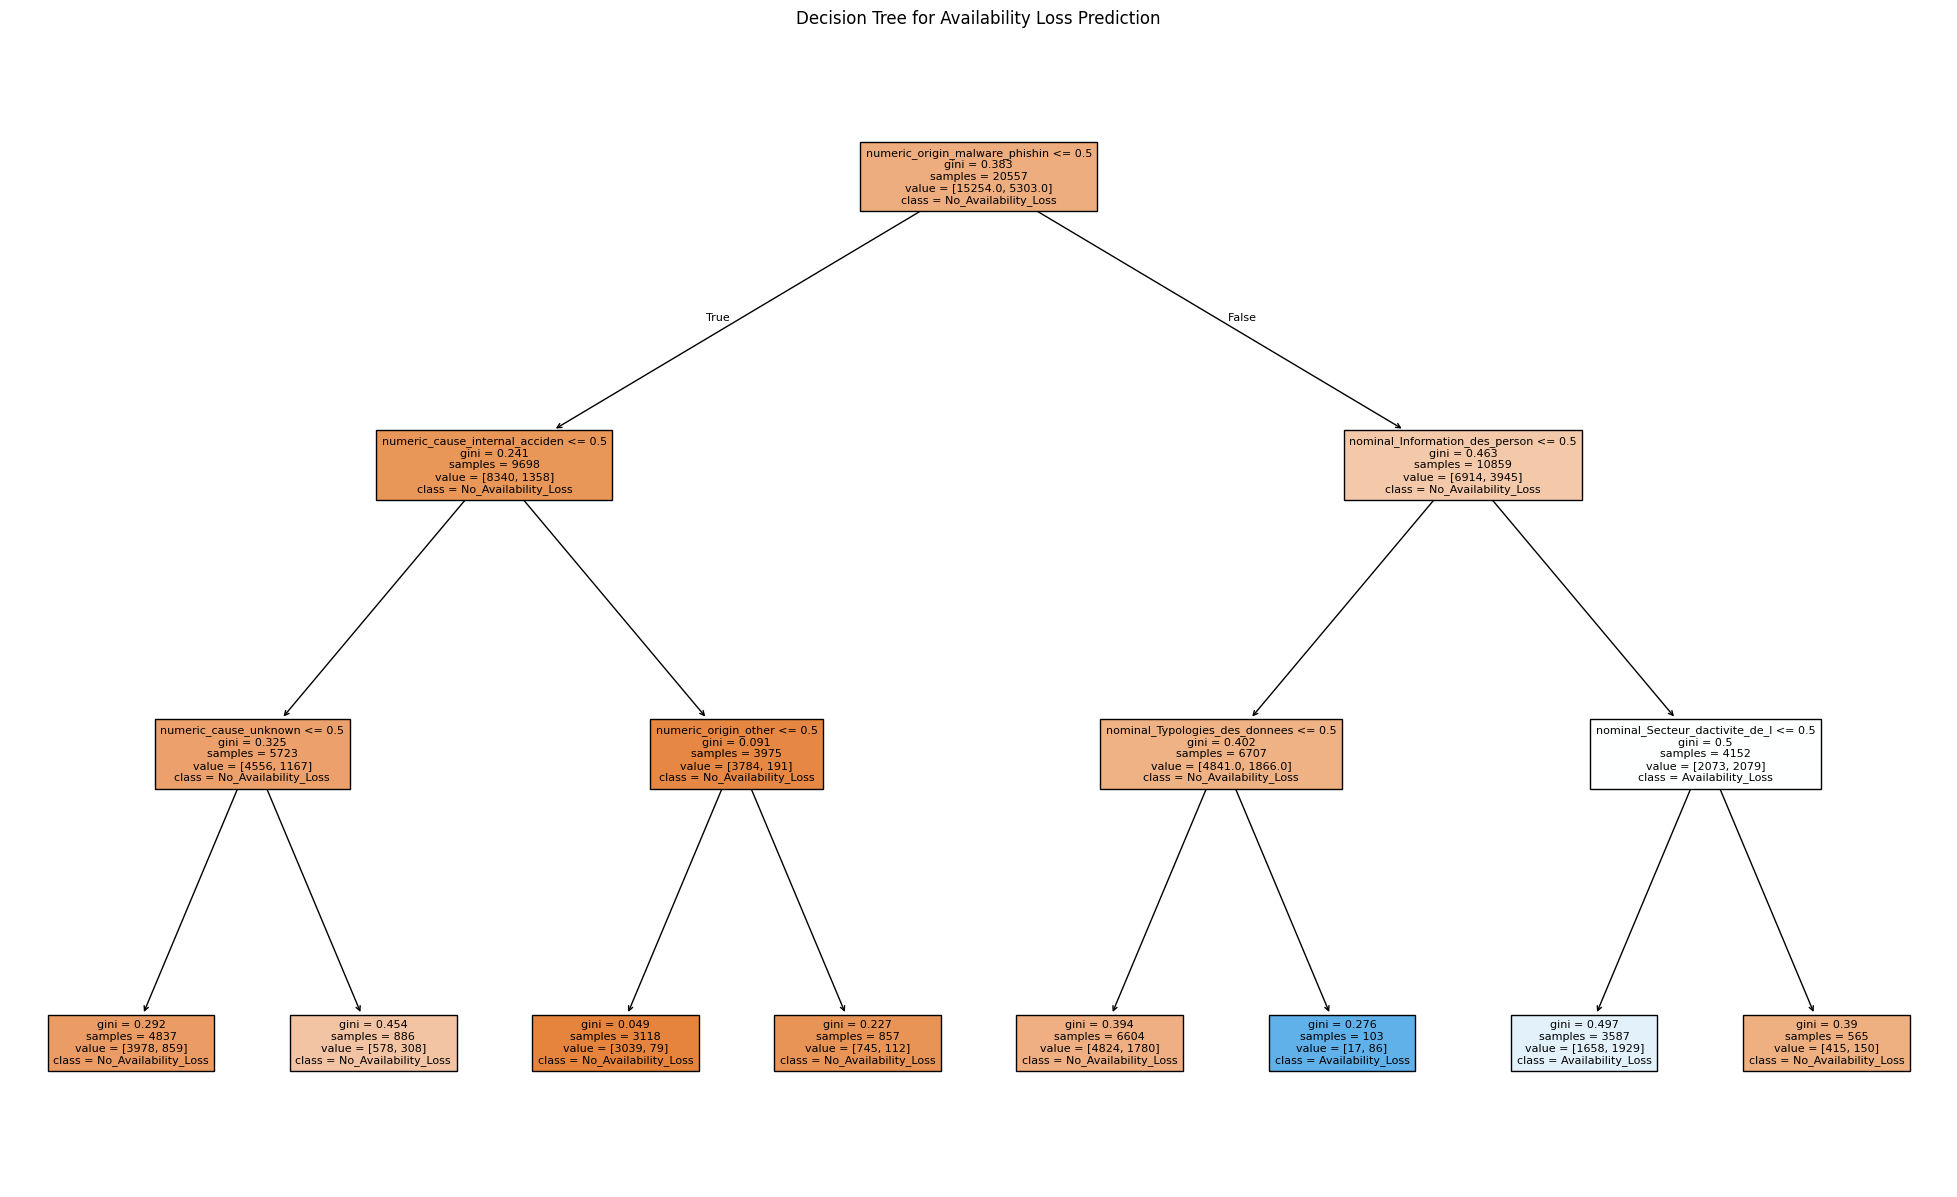

In [50]:
# Generate visualisation of the decision tree
from sklearn.tree import plot_tree
import re

def clean_feature_name(name):
    # Remove all accent characters and special symbols
    name = re.sub(r'[àáâãäåæ]', 'a', name)
    name = re.sub(r'[èéêë]', 'e', name) 
    name = re.sub(r'[ìíîï]', 'i', name)
    name = re.sub(r'[òóôõö]', 'o', name)
    name = re.sub(r'[ùúûü]', 'u', name)
    name = re.sub(r'[ç]', 'c', name)
    
    # Remove problematic punctuation
    name = re.sub(r"[''\"\"`;,]", "", name)
    
    # Replace spaces and special chars with underscores
    name = re.sub(r'[^\w]', '_', name)
    
    # Remove multiple underscores and shorten
    name = re.sub(r'_+', '_', name)
    return name[:30]  # Truncate to 30 chars

# Get preprocessed training data
X_train_processed = pipeline.named_steps['preprocessor'].transform(X_train)

# Convert sparse matrix to dense if needed
if hasattr(X_train_processed, 'toarray'):
    X_train_processed = X_train_processed.toarray()

# Get the actual feature names from the fitted preprocessor
actual_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
clean_feature_names = [clean_feature_name(name) for name in actual_feature_names]

# Verify dimensions match
print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"Number of feature names: {len(clean_feature_names)}")

# Fit the simple tree on preprocessed data
simple_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
simple_tree.fit(X_train_processed, y_train)

plt.figure(figsize=(25,15))
plot_tree(simple_tree, filled=True, 
          feature_names=clean_feature_names,
          class_names=['No_Availability_Loss', 'Availability_Loss'], 
          fontsize=8)
plt.title('Decision Tree for Availability Loss Prediction')
plt.show()

In [51]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Get baseline CV scores with current model
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Grid search for hyperparameter tuning
param_grid = {
    'classifier__max_depth': [5, 10, 15, 20, None],
    'classifier__min_samples_split': [20, 50, 100],
    'classifier__min_samples_leaf': [10, 20, 50]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.3f}")
print(f"Improvement: {grid_search.best_score_ - cv_scores.mean():.3f}")

Cross-validation scores: [0.78035019 0.78229572 0.78400467 0.78381008 0.77972368]
Mean CV accuracy: 0.782 (+/- 0.003)


/usr/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/pyth


Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 20}
Best CV score: 0.796
Improvement: 0.013
